In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def closedFirstGradient(arr: np.array):
    grad = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range( 1, arr.shape[1] - 1 ):
        num = arr[:,i+1] - arr[:,i-1]
        den = np.linalg.norm(arr[:,i+1] - arr[:,i-1])
        grad[:,i] = np.divide(num, den)

    grad[:,-1] = (arr[:,0] - arr[:,-2]) / (np.linalg.norm(arr[:,0] - arr[:,-2]))
    grad[:,0] = (arr[:,1] - arr[:,-1]) / (np.linalg.norm(arr[:,1] - arr[:,-1]))

    return grad

In [40]:
def closedSecondGradient(arr: np.array):
    grad = np.zeros((arr.shape[0],arr.shape[1]))
    for i in range( 1, arr.shape[1] - 1 ):
        num = arr[:,i+1] - 2*arr[:,i] + arr[:,i-1]
        den = np.power(np.linalg.norm(arr[:,i+1] - arr[:,i-1]),2)
        grad[:,i] = np.divide(num, den)

    grad[:,-1] = arr[:,0] - 2*arr[:,-1] + arr[:,-2] / np.power(np.linalg.norm(arr[:,0] - arr[:,-2]),2)
    grad[:,0] = arr[:,1] - 2*arr[:,0] + arr[:,-1] / np.power(np.linalg.norm(arr[:,1] - arr[:,-1]),2)

In [41]:
t = np.linspace(-np.pi,np.pi,1000)
f = lambda t: [np.cos(t), np.sin(t), t*0]
s = np.array( f(t) )

ds = closedFirstGradient(s)
d2s = closedSecondGradient(s)

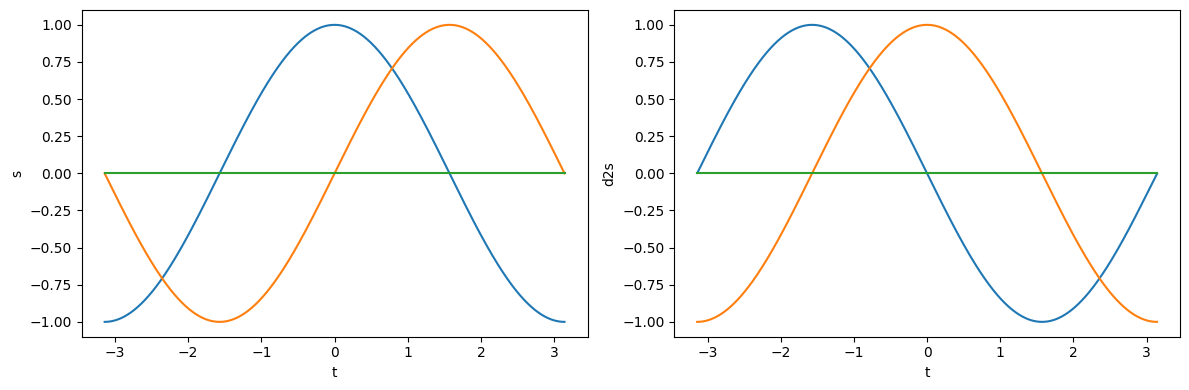

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(t, s[0,:])
axs[0].plot(t, s[1,:])
axs[0].plot(t, s[2,:])
axs[0].set_xlabel('t')
axs[0].set_ylabel('s')

# Second plot
axs[1].plot(t, ds[0,:])
axs[1].plot(t, ds[1,:])
axs[1].plot(t, ds[2,:])
axs[1].set_xlabel('t')
axs[1].set_ylabel('d2s')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()